In [1]:
import tensorflow as tf

C:\Users\AkhouriAditya\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
a = tf.constant([2])
b = tf.constant([3])
c = a+b
session = tf.Session()
result  = session.run(c)
print(result)

[5]


In [4]:
with tf.Session() as session:
    result = session.run(c)
    print(result)

[5]


In [11]:
with tf.Session() as session:
    result = session.run(c)
    print ("The Multiplication of this two constants is: {0}".format(result))

The Multiplication of this two constants is: [5]


In [13]:
matrixA = tf.constant([[2,3],[3,4]])
matrixB = tf.constant([[2,3],[3,4]])
c = matrixA * matrixB
firstOp = tf.multiply(matrixA, matrixB)
secondOp = tf.matmul(matrixA, matrixB)
with tf.Session() as session:
    resultA = session.run(firstOp)
    resultB = session.run(secondOp)
    print ("The Multiplication of element wise op is: {0}".format(resultA))
    print ("The Multiplication of two matrices is: {0}".format(resultB))

The Multiplication of element wise op is: [[ 4  9]
 [ 9 16]]
The Multiplication of two matrices is: [[13 18]
 [18 25]]


In [14]:
a=tf.constant(1000)
b=tf.Variable(0)
init_op = tf.global_variables_initializer()

In [17]:
update = tf.assign(b,a) #used to update the value of variable b with a
with tf.Session() as session:
    session.run(init_op)
    session.run(update)
    print(session.run(b))

1000


In [22]:
#Fibonacci sequence
f = [tf.constant(1), tf.constant(1)]
for i in range(2,10):
    temp= f[i-1]+f[i-2]
    f.append(temp)
    
with tf.Session() as sess:
    result = sess.run(f)
    print(result)



[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [38]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

c=2*a -b

dictionary = {a:[1,2,3],b:[3,4,5]}
with tf.Session() as session:
    print (session.run(c,feed_dict=dictionary))

[-1.  0.  1.]


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
#downloading dataset
!wget -nv C:\Users\AkhouriAditya\Documents\fidelity\data\PierceCricketData.csv --no-check-certificate https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv


df = pd.read_csv("C:\\Users\\AkhouriAditya\\Documents\\fidelity\\data\\PierceCricketData.csv")
df.head()

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\Gow/etc/wgetrc
wget: unable to resolve host address `c'
  Unable to locally verify the issuer's authority.
  Unable to locally verify the issuer's authority.
  Unable to locally verify the issuer's authority.
2018-02-19 19:13:27 URL:https://public.boxcloud.com/d/1/TK4WCfZysn1hjBLvNyZjyEGaexJai4U2UKGWi9zo0ToLIF7Eu-uN30DB8338H4ZOlkwpBGXEfnctn8ca9yDnUewlYrV_6Pj8rb7rtOorZCBb9bfN8EggoCAMW0zgSF54kThKD_8X25H7txVoS2iyT3xz83MzXz6p_-sLm6HfX8k_crALvCCyLCPEktIoyqfxmQlQGyYhqZVoRWGvIsSDEG2ziUMMYduRYBvX_wYjvJ-EcaYMgsIY-2LpyY1CvUG-9kCw_1kPx3xTDfctuLX7_aru7Bc6gK29kBYDW_k__hNIR8TPwOGs1ah-qT16wCzGvVZDVlGSKIr0i1ZVeev0DIdmDbhS8uHBEa8dQHmganjphr3RF5vVPYRrXIA_VoRfiFoKCCQS5CCqmqj1MtP45u4X6tVpG0B5v3vIwJY6We1M90e7_3KfeNGB78XzTiF0EwwySuc0oaogaTTrcf_z6MfagVljVmBhEihs91zQsFZjW0R9voyMRgTqzDLoobG6jhMzFdamvyIOyOm-Udbn64O-f8_K798_noyWTrLKjYJpjyNrCM0eGS5gChIJLRyKBTCKE2ZCZOf1--B7J-hZIl9BRsFthrhKkzaQACgO1Sn9FpK14vuKyjpPD5xyPbb6mflVHMXsPMFu-X2y

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


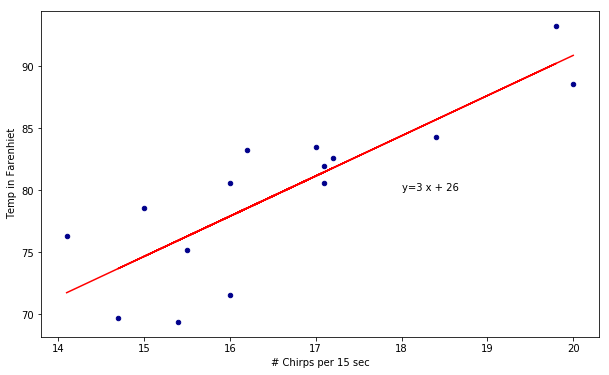

In [58]:
%matplotlib inline

x_data, y_data = (df["Chirps"].values,df["Temp"].values)
fit = np.polyfit(x_data, y_data, deg=1)

# plots the data points
ax = df.plot(kind='scatter', x='Chirps', y='Temp', figsize=(10, 6), color='darkblue')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

plt.plot(x_data,fit[0]*x_data + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(18, 80))

#df.plot.line(x='Chirps', y='Temp', ax=ax, style='b')

plt.show()

In [61]:
X = tf.placeholder(tf.float32, shape=(x_data.size))
Y = tf.placeholder(tf.float32,shape=(y_data.size))
# the copy to relfect any changes in the variable values through out the scope of the tensorflow session
m = tf.Variable(3.0)
c = tf.Variable(2.0)
# Construct a Model
Ypred = tf.add(tf.multiply(X, m), c)

In [69]:
#create session and initialize variables
session = tf.Session()
session.run(tf.global_variables_initializer())

Text(0,0.5,'Temp in Farenhiet')

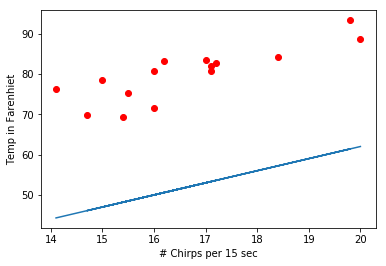

In [70]:
pred = session.run(Ypred, feed_dict={X:x_data})

#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")

In [71]:
# normalization factor
nf = 1e-1
# seting up the loss function
loss = tf.reduce_mean(tf.squared_difference(Ypred*nf,Y*nf))

In [72]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.train.AdagradOptimizer(0.01 )

# pass the loss function that optimizer should optimize on.
train = optimizer.minimize(loss)

In [73]:
session.run(tf.global_variables_initializer())

In [74]:
convergenceTolerance = 0.0001
previous_m = np.inf
previous_c = np.inf

steps = {}
steps['m'] = []
steps['c'] = []

losses=[]

for k in range(100000):
   ########## Your Code goes Here ###########
    _, _m , _c,_l = session.run([train, m, c,loss],feed_dict={X:x_data,Y:y_data})
    steps['m'].append(_m)
    steps['c'].append(_c)
    losses.append(_l)
    if (np.abs(previous_m - _m) <= convergenceTolerance) or (np.abs(previous_c - _c) <= convergenceTolerance):
        print ("Finished by Convergence Criterion")
        print (k)
        print (_l)
        break
    previous_m = _m, 
    previous_c = _c, 
    
session.close() 

Finished by Convergence Criterion
81
0.18440054


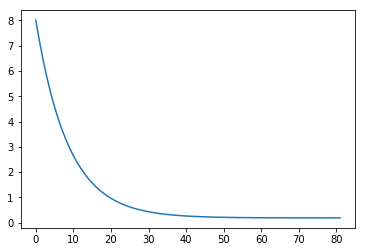

In [75]:
plt.plot(losses[:])

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
import numpy as np
LSTM_CELL_SIZE = 4  # output size (dimension), which is same as hidden size in the cell
lstm_cell = tf.contrib.rnn.BasicLSTMCell(LSTM_CELL_SIZE, state_is_tuple=True)
state = (tf.zeros([2,LSTM_CELL_SIZE]),)*2
state

(<tf.Tensor 'zeros:0' shape=(2, 4) dtype=float32>,
 <tf.Tensor 'zeros:0' shape=(2, 4) dtype=float32>)

In [4]:
sample_input = tf.constant([[1,2,3,4,3,2],[3,2,2,2,2,2]],dtype=tf.float32)
print (sess.run(sample_input))

[[1. 2. 3. 4. 3. 2.]
 [3. 2. 2. 2. 2. 2.]]


In [5]:
with tf.variable_scope("LSTM_sample1"):
    output, state_new = lstm_cell(sample_input, state)
sess.run(tf.global_variables_initializer())
print (sess.run(state_new))

LSTMStateTuple(c=array([[-0.395452  ,  0.5808035 , -0.03769115,  0.7500076 ],
       [-0.36502987,  0.73099   , -0.08001775,  0.5641742 ]],
      dtype=float32), h=array([[-0.14694393,  0.01968188, -0.03688967,  0.47338507],
       [-0.07165978,  0.03890254, -0.06874768,  0.42081547]],
      dtype=float32))


In [34]:
import pandas as pd
train = pd.read_csv("C:\\Users\\AkhouriAditya\\Documents\\fidelity\\data\\iris_training.csv", header=0)
test = pd.read_csv("C:\\Users\\AkhouriAditya\\Documents\\fidelity\\data\\iris_test.csv", header=0)
train.columns = ['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth', 'Species']
test.columns = ['SepalLength', 'SepalWidth','PetalLength', 'PetalWidth', 'Species']

In [35]:
#train.columns
train_features, train_label = train, train.pop(label_name)
test_features, test_label = test, test.pop(label_name)

In [39]:
# Create feature columns for all features.
my_feature_columns = []
for key in train_features.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [50]:
def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    dataset = dataset.shuffle(buffer_size=1000).repeat(count=None).batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

In [62]:
def eval_input_fn(features, labels=None, batch_size=None):
    """An input function for evaluation or prediction"""
    if labels is None:
        # No labels, use only features.
        inputs = dict(features)
    else:
        inputs = (dict(features), labels)

    # Convert inputs to a tf.dataset object.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the read end of the pipeline.
    return dataset.make_one_shot_iterator().get_next()

In [69]:
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,hidden_units=[10, 10],n_classes=3)
classifier.train(input_fn=lambda:train_input_fn(train_features, train_label, 1),steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\AKHOUR~1\\AppData\\Local\\Temp\\tmp8lz7fc5v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002005FF8C668>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\AKHOUR~1\AppData\Local\Temp\tmp8lz7fc5v\model.ckpt.
INFO:tensorflow:loss = 0.91697836, step = 1
INFO:tensorflow:global_step/sec: 625.685
INFO:tensorflow:loss = 0.44844663, step = 101 (0.160 sec)
INFO:tensorflow:global_step/sec: 651.54
INFO:tensorflow:loss = 0.05495689, step = 201

In [70]:
eval_result = classifier.evaluate(input_fn=lambda:eval_input_fn(test_features, test_label, 1))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Starting evaluation at 2018-02-15-20:28:48
INFO:tensorflow:Restoring parameters from C:\Users\AKHOUR~1\AppData\Local\Temp\tmp8lz7fc5v\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-15-20:28:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.96666664, average_loss = 0.30216143, global_step = 1000, loss = 0.30216143

Test set accuracy: 0.967



In [71]:
predict_x = {
        'SepalLength': [5.1, 5.9, 6.9],
        'SepalWidth': [3.3, 3.0, 3.1],
        'PetalLength': [1.7, 4.2, 5.4],
        'PetalWidth': [0.5, 1.5, 2.1],
    }

In [72]:
predict_x

{'PetalLength': [1.7, 4.2, 5.4],
 'PetalWidth': [0.5, 1.5, 2.1],
 'SepalLength': [5.1, 5.9, 6.9],
 'SepalWidth': [3.3, 3.0, 3.1]}

In [121]:
predictions = classifier.predict(input_fn=lambda:eval_input_fn(predict_x, batch_size=1))

In [122]:
for i in predictions:
    for key,val in i.items():
        print(key, max(val))

INFO:tensorflow:Restoring parameters from C:\Users\AKHOUR~1\AppData\Local\Temp\tmp8lz7fc5v\model.ckpt-1000
logits 3.2046704
probabilities 0.9935875
class_ids 0
classes b'0'
logits 0.715932
probabilities 0.6342032
class_ids 1
classes b'1'
logits 1.420732
probabilities 0.73863524
class_ids 2
classes b'2'


In [125]:
# Represent a 10-element vector in which each cell contains a tf.float32.
vector_feature_column = tf.feature_column.numeric_column(key="Bowling",\
                                                         shape=10)

# Represent a 10x5 matrix in which each cell contains a tf.float32.
matrix_feature_column = tf.feature_column.numeric_column(key="MyMatrix",\
                                                         shape=[10,5])

In [126]:
matrix_feature_column

_NumericColumn(key='MyMatrix', shape=(10, 5), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [127]:
numeric_feature_column = tf.feature_column.numeric_column("Year")
bucketized_feature_column = tf.feature_column.bucketized_column(source_column = numeric_feature_column,boundaries = [1960, 1980, 2000])

In [128]:
identity_feature_column = tf.feature_column.categorical_column_with_identity(key='my_feature_b',num_buckets=4)
def input_fn():
    return ({ 'my_feature_a':[7, 9, 5, 2], 'my_feature_b':[3, 1, 2, 2] },[Label_values])

In [129]:
vocabulary_feature_column =tf.feature_column.categorical_column_with_vocabulary_list(\
                   key="a feature returned by input_fn()",vocabulary_list=["kitchenware", "electronics", "sports"])